## Test: Plot one of the Spectra from de Graaf et. al (2025)

All the spectra data is available at: https://s3.amazonaws.com/msaexp-nirspec/extractions/nirspec_public_v4.4.html?&search=capers-cos10-v4_prism-clear_6368_30440.spec.fits


Filename: DeGraaff_espectros/capers-cos07-v4_prism-clear_6368_43711.spec.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  SPEC1D        1 BinTableHDU    400   473R x 9C   [D, D, D, D, D, D, D, D, D]   
  2  SCI           1 ImageHDU       377   (473, 31)   float64   
  3  WHT           1 ImageHDU       377   (473, 31)   float64   
  4  PROFILE       1 ImageHDU       377   (473, 31)   float64   
  5  PROF1D        1 BinTableHDU     25   31R x 3C   [D, D, D]   
  6  BACKGROUND    1 ImageHDU       377   (473, 31)   float64   
  7  SLITS         1 BinTableHDU    107   18R x 49C   [65A, K, K, D, D, D, D, D, K, 10A, D, D, D, D, 3A, K, K, D, D, K, K, K, K, K, K, K, 4A, 5A, 5A, 25A, K, K, D, K, K, K, 7A, D, D, D, D, 17A, K, K, 4A, K, K, D, D]   


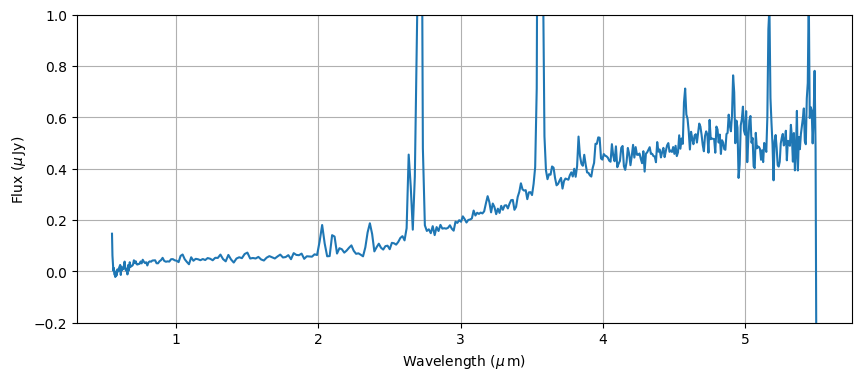

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
import astropy.units as u
from astropy.visualization import quantity_support

# Enable quantity support for units on plot axes (optional, but recommended)
quantity_support()

# 1. Open the FITS file
# Replace 'your_spectrum_file.fits' with the path to your file
fits_file_path = "DeGraaff_espectros/capers-cos07-v4_prism-clear_6368_43711.spec.fits"
hdul = fits.open(fits_file_path)

# Print file info to understand its structure
hdul.info() 

# 2. Access the data and header
data = hdul[1].data
data

# 3. Assign the columns
flux = data["flux"] # second column as flux 
wavelength = data["wave"] # first column as wavelength 

# Close the FITS file
hdul.close()

# 4. Plot the spectrum
plt.figure(figsize=(10, 4))
plt.plot(wavelength, flux)
plt.xlabel(r'Wavelength ($\mu\,$m)') 
plt.ylabel(r'Flux ($\mu\,$Jy)') 
plt.ylim(-0.2,1.0)
#plt.xlim(0.5,5.5)
plt.grid(True)
#plt.savefig('capers-cos07-v4_prism-clear_6368_43711.pdf')
plt.show()



Filename: DeGraaff_espectros/capers-cos07-v4_prism-clear_6368_43711.spec.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  SPEC1D        1 BinTableHDU    400   473R x 9C   [D, D, D, D, D, D, D, D, D]   
  2  SCI           1 ImageHDU       377   (473, 31)   float64   
  3  WHT           1 ImageHDU       377   (473, 31)   float64   
  4  PROFILE       1 ImageHDU       377   (473, 31)   float64   
  5  PROF1D        1 BinTableHDU     25   31R x 3C   [D, D, D]   
  6  BACKGROUND    1 ImageHDU       377   (473, 31)   float64   
  7  SLITS         1 BinTableHDU    107   18R x 49C   [65A, K, K, D, D, D, D, D, K, 10A, D, D, D, D, 3A, K, K, D, D, K, K, K, K, K, K, K, 4A, 5A, 5A, 25A, K, K, D, K, K, K, 7A, D, D, D, D, 17A, K, K, 4A, K, K, D, D]   


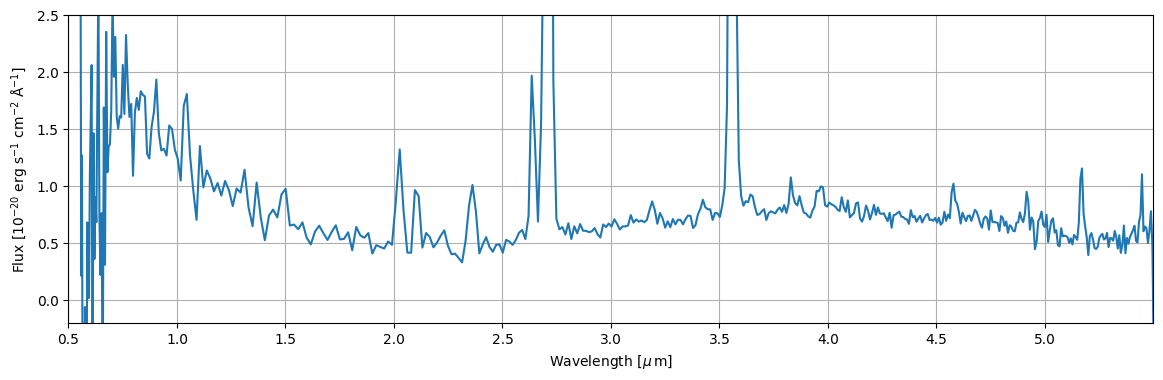

In [15]:
## Espectro com flux_lambda

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
import astropy.units as u
from astropy.visualization import quantity_support

# Enable quantity support for units on plot axes (optional, but recommended)
quantity_support()

# 1. Open the FITS file
# Replace 'your_spectrum_file.fits' with the path to your file
fits_file_path = "DeGraaff_espectros/capers-cos07-v4_prism-clear_6368_43711.spec.fits"
hdul = fits.open(fits_file_path)

# Print file info to understand its structure
hdul.info() 

# 2. Access the data and header
data = hdul[1].data
data

#### convert  
c = 2.998e10  # cm/s

wave_um = data['wave']
flux_uJy = data['flux']
err_uJy  = data['err']

# µJy -> erg/s/cm^2/Hz
Fnu = flux_uJy * 1e-29
Ferr_nu = err_uJy * 1e-29

# wavelength in cm
lam_cm = wave_um * 1e-4

# F_lambda in erg/s/cm^2/Å
Flam = Fnu * c / lam_cm**2 / 1e8
Ferr_lam = Ferr_nu * c / lam_cm**2 / 1e8

Flam_e20 = Flam * 1e20

######

# Close the FITS file
hdul.close()

# 4. Plot the spectrum
plt.figure(figsize=(14, 4))
plt.plot(wave_um, Flam_e20)
plt.xlabel(r'Wavelength [$\mu\,$m]') 
plt.ylabel(r'Flux [10$^{-20}$ erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$]')
plt.xticks(np.arange(0.5,5.5,0.5)) 
plt.ylim(-0.2,2.5)
plt.xlim(0.5,5.5)
plt.grid(True)
#plt.savefig('capers-cos07-v4_prism-clear_6368_43711.pdf')
plt.show()

